### NLP Assignment 1- Part 1: Digital content management
• CONTEXT: Classification is probably the most popular task that you would deal with in real life. Text in the form of blogs, posts, articles, 
etc. is written every second. It is a challenge to predict the information about the writer without knowing about him/her. We are going to 
create a classifier that predicts multiple features of the author of a given text. We have designed it as a Multi label classification problem.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# change the drive location
import os
os.chdir('/content/drive/My Drive/ColabNotebooks//')

In [3]:
## Setting up environvenment on colabs 
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:

import gc
gc.enable

<function gc.enable>

In [5]:
from nltk.tokenize import RegexpTokenizer
import numpy as np
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [6]:


# Importing pandas for operating on dataset
import pandas as pd

df = pd.read_csv('blogtext.csv' , nrows=5000)

In [7]:
df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [8]:
df.text[7]

"             If anything, Korea is a country of extremes.  Everything here seems fad-based.  I think it may come from Korea's history.  It has been invaded a reported 700 times over the years, and each time they got independence I imagine they had to move quickly to get to the next level before the next war or occupation.  Lately (well, not really lately...in 1945) the Japanese Occupation ended.  Then the Korean War occurred from 1950-3.  After that there was turmoil, but in 1961 Park Chung Hee took over as dictator/president.  He had elections, in which everyone was 'encouraged' to vote, but he was still a dictator.  After his assassination in 1979 the next few leaders were basically of the same ilk.  President Park did some amazing things in his time, however.  He took an incredibly backward country and set it on the road to industrialization. Japan had stripped Korea of its resources, people and even its language and culture (many buildings and palaces were razed and Japanese was t

In [9]:
df.text[2]

"           In het kader van kernfusie op aarde:  MAAK JE EIGEN WATERSTOFBOM   How to build an H-Bomb From: ascott@tartarus.uwa.edu.au (Andrew Scott) Newsgroups: rec.humor Subject: How To Build An H-Bomb (humorous!) Date: 7 Feb 1994 07:41:14 GMT Organization: The University of Western Australia  Original file dated 12th November 1990. Seemed to be a transcript of a 'Seven Days' article. Poorly formatted and corrupted. I have added the text between 'examine under a microscope' and 'malleable, like gold,' as it was missing. If anyone has the full text, please distribute. I am not responsible for the accuracy of this information. Converted to HTML by Dionisio@InfiNet.com 11/13/98. (Did a little spell-checking and some minor edits too.) Stolen from  urlLink http://my.ohio.voyager.net/~dionisio/fun/m...own-h-bomb.html  and reformatted the HTML. It now validates to XHTML 1.0 Strict. How to Build an H-Bomb Making and owning an H-bomb is the kind of challenge real Americans seek. Who wants to 

In [10]:
df.shape

(5000, 7)

In [11]:
###Typical blog

In [12]:
df.text[5]

"             I had an interesting conversation with my Dad this morning.  We were talking about where Koreans put their money.  Invariably, they have a lot of real estate and cash.  (Cash would include short term investments under one year as well as savings accounts.)  The reason?  Real estate makes money here.  A lot of money.  I've seen surveys of Seoul real estate rising about 10-15% PER YEAR for long stretches, even after taking into account the 1997 Crisis (referred to as the IMF crisis here, although it was the IMF that bailed Korea out).  Compare that to Korean corporate bonds which fell 90-99% in 1997 and only modestly recovered, and a local stock market (represented by KOSPI, or their version of the Dow Jones Index) that has not gone appreciably above its 1980s high of 1,000 points (it is now about 800 points, see  urlLink link ) and you can see why real estate makes sense here.  But back to the conversation...I noted that here a 'real big' or 'elite' real estate investor ha

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5000 non-null   int64 
 1   gender  5000 non-null   object
 2   age     5000 non-null   int64 
 3   topic   5000 non-null   object
 4   sign    5000 non-null   object
 5   date    5000 non-null   object
 6   text    5000 non-null   object
dtypes: int64(2), object(5)
memory usage: 273.6+ KB


In [14]:
#chceck for na values
df.isna().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

### Exploring the Data

In [15]:
print(df.topic.unique())

['Student' 'InvestmentBanking' 'indUnk' 'Non-Profit' 'Banking' 'Education'
 'Engineering' 'Science' 'Communications-Media' 'BusinessServices'
 'Sports-Recreation' 'Arts' 'Internet' 'Museums-Libraries' 'Accounting'
 'Technology' 'Law' 'Consulting' 'Automotive' 'Religion']


In [16]:
print(df.sign.unique())

['Leo' 'Aquarius' 'Aries' 'Capricorn' 'Gemini' 'Cancer' 'Sagittarius'
 'Scorpio' 'Libra' 'Virgo' 'Taurus' 'Pisces']


In [17]:
print(df.gender.unique())

['male' 'female']


In [18]:
print(df.age.unique())

[15 33 14 25 17 23 37 26 24 27 45 34 41 44 16 39 35 36 46 42]


In [19]:
df.gender.value_counts()

male      3294
female    1706
Name: gender, dtype: int64

In [20]:
import seaborn as sns
import matplotlib as plt
%matplotlib inline

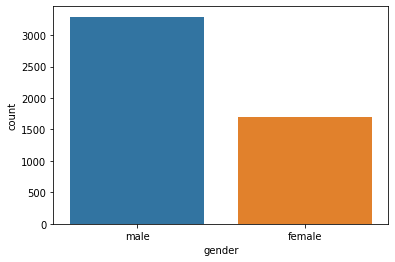

In [21]:
sns.countplot(x='gender',data=df)


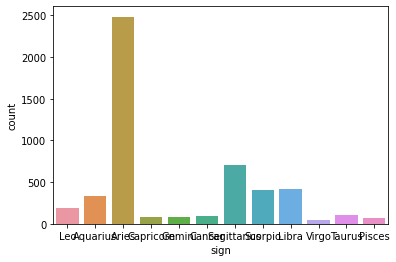

In [22]:
sns.countplot(x='sign',data=df)

In [23]:
df.insert(7,'tok_words','')

In [24]:
df.head()

,id,gender,age,topic,sign,date,text,tok_words
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,...",
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...,
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...,
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!,
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...,


### **Preprocessing**
- [ ] remove unwanted space 
- [ ] remove unwanted characters / remove Punctuation
- [ ] remove Stopwords 
- [ ] convert text to lowercase
- [ ] Stemming ( Snowball )

In [25]:
## truncated dataset to start on rapid protyping to preprocessing 
df_txt = df[["text"]]

In [26]:
pd.options.mode.chained_assignment = None
df_txt['text'] = df_txt[['text']]
df_txt["text"] = df_txt["text"].astype(str)


In [27]:
### converting to lower case

df_txt["text_lower"] = df_txt["text"].str.lower()
df_txt.head()

,text,text_lower
0,"Info has been found (+/- 100 pages,...","info has been found (+/- 100 pages,..."
1,These are the team members: Drewe...,these are the team members: drewe...
2,In het kader van kernfusie op aarde...,in het kader van kernfusie op aarde...
3,testing!!! testing!!!,testing!!! testing!!!
4,Thanks to Yahoo!'s Toolbar I can ...,thanks to yahoo!'s toolbar i can ...


In [28]:
import string

In [29]:
#### Removal of stopwords

PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('','',PUNCT_TO_REMOVE))
                                        
df_txt["text_wo_punctuation"] = df_txt["text_lower"].apply(lambda text: remove_punctuation(text))
df_txt.head()

,text,text_lower,text_wo_punctuation
0,"Info has been found (+/- 100 pages,...","info has been found (+/- 100 pages,...",info has been found 100 pages and ...
1,These are the team members: Drewe...,these are the team members: drewe...,these are the team members drewes...
2,In het kader van kernfusie op aarde...,in het kader van kernfusie op aarde...,in het kader van kernfusie op aarde...
3,testing!!! testing!!!,testing!!! testing!!!,testing testing
4,Thanks to Yahoo!'s Toolbar I can ...,thanks to yahoo!'s toolbar i can ...,thanks to yahoos toolbar i can no...


In [30]:
### REmoval of stop words

from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

# gc.collect()

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [31]:
STOPWORDS = set(stopwords.words('english'))

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df_txt["text_wo_stop"] = df_txt["text_wo_punctuation"].apply(lambda text : remove_stopwords(text))
df_txt.head()

,text,text_lower,text_wo_punctuation,text_wo_stop
0,"Info has been found (+/- 100 pages,...","info has been found (+/- 100 pages,...",info has been found 100 pages and ...,info found 100 pages 45 mb pdf files wait unti...
1,These are the team members: Drewe...,these are the team members: drewe...,these are the team members drewes...,team members drewes van der laag urllink mail ...
2,In het kader van kernfusie op aarde...,in het kader van kernfusie op aarde...,in het kader van kernfusie op aarde...,het kader van kernfusie op aarde maak je eigen...
3,testing!!! testing!!!,testing!!! testing!!!,testing testing,testing testing
4,Thanks to Yahoo!'s Toolbar I can ...,thanks to yahoo!'s toolbar i can ...,thanks to yahoos toolbar i can no...,thanks yahoos toolbar capture urls popupswhich...


In [ ]:
# stemmer = SnowballStemmer("english", ignore_stopwords=True)
# df["stemmed"] = df["text"].apply(lambda texts : [stemmer.stem(text) for text in texts])
# df["stemmed"]

In [32]:

# Pipeline the pre-processing 


def clean_text(text):
    text = text.strip()
    text = remove_punctuation(text)
    text = remove_stopwords(text)
    text = text.lower()
    return text
df["text"] = df["text"].map(lambda text : clean_text(text))
# df["text"] = df["text"].apply(lambda x: [stemmer.stem(y) for y in x])

In [33]:
gc.collect()

df.head()

,id,gender,age,topic,sign,date,text,tok_words
0,2059027,male,15,Student,Leo,"14,May,2004",info found 100 pages 45 mb pdf files now wait ...,
1,2059027,male,15,Student,Leo,"13,May,2004",these team members drewes van der laag urllink...,
2,2059027,male,15,Student,Leo,"12,May,2004",in het kader van kernfusie op aarde maak je ei...,
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing,
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",thanks yahoos toolbar i capture urls popupswhi...,


### Merge labels for multi-label classification problem
   Label columns to merge : ["gender", "age", "topic", "sign"]


In [34]:
df["age"] = df["age"].astype(str)
df["labels"] = df.apply(lambda col :
                            [col["gender"],col["age"],col["topic"],col["sign"]],axis =1)

In [35]:
df.drop(columns=["gender","age","sign","topic"],axis =1, inplace = True)
gc.collect()

88

In [36]:
from sklearn.model_selection import train_test_split

X = df.text[:125000]
y = df.labels[:125000]

X_train, X_test, y_train, y_test =train_test_split(X,y, random_state=42,
                                                   test_size = 0.1,
                                                  shuffle = True)

In [37]:
print("shape of training set :", X_train.shape)
print("shape of test set :", X_test.shape)

shape of training set : (4500,)
shape of test set : (500,)


### Vectorizing the features
1. Bag of words 
2. TfIDF
Counte Vectorizer on BoW¶

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

ctv = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                      ngram_range=(1, 3), stop_words = 'english')

# inspired by : https://www.kaggle.com/abhishek/approaching-almost-any-nlp-problem-on-kaggle
# # Fitting Count Vectorizer to both training and test sets (semi-supervised learning)

corpus = list(X_train)
#corpus = list(X_train)+list(X_test)

In [39]:
ctv.fit(corpus)

CountVectorizer(ngram_range=(1, 3), stop_words='english',
                token_pattern='\\w{1,}')

In [40]:
# gc.collect()
xtrain_ctv = ctv.transform(X_train)

### Limiting to 100000 in XTrain otherwise the colab with gpu is crashing

In [41]:
ctv.get_feature_names()[:10]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['0',
 '0 23003',
 '0 23003 64121',
 '0 answering',
 '0 answering machine',
 '0 bb',
 '0 bb 4',
 '0 bb 6',
 '0 breaking',
 '0 breaking cycle']

In [42]:
# gc.collect()
xtest_ctv = ctv.transform(X_test)

In [43]:
tfv = TfidfVectorizer(min_df=3,  max_features=None, 
             strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
             ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
             stop_words = 'english')


# # Fitting TF-IDF to both training and test sets (semi-supervised learning)
tfv.fit(list(X_train) + list(X_test))
xtrain_tfv =  tfv.transform(X_train) 
xvalid_tfv = tfv.transform(X_test)


# gc.collect() 

### create a dictionary to get a count of every label

In [44]:


label_counts=dict()

for labels in df.labels.values:
    for label in labels:
        if label in label_counts:
            label_counts[str(label)]+=1
        else:
            label_counts[str(label)]=1
        
label_counts


# gc.collect()

{'14': 170,
 '15': 339,
 '16': 67,
 '17': 331,
 '23': 137,
 '24': 353,
 '25': 268,
 '26': 96,
 '27': 86,
 '33': 101,
 '34': 540,
 '35': 2307,
 '36': 60,
 '37': 19,
 '39': 79,
 '41': 14,
 '42': 9,
 '44': 3,
 '45': 14,
 '46': 7,
 'Accounting': 2,
 'Aquarius': 329,
 'Aries': 2483,
 'Arts': 31,
 'Automotive': 14,
 'Banking': 16,
 'BusinessServices': 87,
 'Cancer': 94,
 'Capricorn': 84,
 'Communications-Media': 61,
 'Consulting': 16,
 'Education': 118,
 'Engineering': 119,
 'Gemini': 86,
 'Internet': 20,
 'InvestmentBanking': 70,
 'Law': 3,
 'Leo': 190,
 'Libra': 414,
 'Museums-Libraries': 2,
 'Non-Profit': 47,
 'Pisces': 67,
 'Religion': 4,
 'Sagittarius': 704,
 'Science': 33,
 'Scorpio': 408,
 'Sports-Recreation': 75,
 'Student': 569,
 'Taurus': 100,
 'Technology': 2332,
 'Virgo': 41,
 'female': 1706,
 'indUnk': 1381,
 'male': 3294}

In [45]:
from sklearn.preprocessing import MultiLabelBinarizer

# Transform between iterable of iterables and a multilabel format
binarizer=MultiLabelBinarizer(classes=sorted(label_counts.keys()))


y_train = binarizer.fit_transform(y_train)
y_test = binarizer.transform(y_test)

### Multi-Label Classification Techniques
​
    Most traditional learning algorithms are developed for single-label classification problems. Therefore a lot of approaches in the literature transform the multi-label problem into multiple single-label problems, so that the existing single-label algorithms can be used.

### Accuracy metric 
​
​
Before diving into preparing models , let's settle with Metrics to measure prediction score
​
        1. Accuracy score
        2. F1 Score
        3. Average precision score : 
            3.1 Macro averaged precision: calculate precision for all classes
                individually and then average them
            3.2 Micro averaged precision: calculate class wise true positive and false
                positive and then use that to calculate overall precision
        4. Average recall score
​
​

### Feature Selection
Chi-square test measures dependence between stochastic variables, so using this function “weeds out” the features that are the most likely to be independent of class and therefore irrelevant for classification.

In [46]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

   #    metrics.f1_score(y_test, y_pred, labels=np.unique(y_pred))

def display_metrics_micro(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: Micro', f1_score(Ytest, Ypred, average='micro',labels=np.unique(Ypred)))
    print('Average precision score: Micro', average_precision_score(Ytest, Ypred, average='micro'))
    print('Average recall score: Micro', recall_score(Ytest, Ypred, average='micro'))
    
    
def display_metrics_macro(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: Macro', f1_score(Ytest, Ypred, average='macro',labels=np.unique(Ypred)))
    print('Average recall score: MAcro', recall_score(Ytest, Ypred, average='macro'))
    
def display_metrics_weighted(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: weighted', f1_score(Ytest, Ypred, average='weighted',labels=np.unique(Ypred)))
    print('Average precision score: weighted', average_precision_score(Ytest, Ypred, average='weighted'))
    print('Average recall score: weighted', recall_score(Ytest, Ypred, average='weighted'))

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

In [48]:
# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([ ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),])


In [49]:
print(xtrain_ctv[0])

  (0, 78227)	1
  (0, 78228)	1
  (0, 78229)	1
  (0, 85012)	1
  (0, 85013)	1
  (0, 85014)	1
  (0, 130768)	1
  (0, 130898)	1
  (0, 130899)	1
  (0, 146281)	1
  (0, 146282)	1
  (0, 146283)	1
  (0, 146284)	1
  (0, 146285)	1
  (0, 159781)	1
  (0, 159814)	1
  (0, 159817)	1
  (0, 167326)	1
  (0, 167427)	1
  (0, 167428)	1
  (0, 189787)	1
  (0, 189918)	1
  (0, 189919)	1
  (0, 205593)	2
  (0, 206939)	2
  :	:
  (0, 349942)	1
  (0, 395440)	1
  (0, 395601)	1
  (0, 395602)	1
  (0, 402409)	2
  (0, 402520)	1
  (0, 402521)	1
  (0, 402600)	1
  (0, 402601)	1
  (0, 499615)	2
  (0, 499666)	1
  (0, 499667)	1
  (0, 499770)	1
  (0, 499771)	1
  (0, 515564)	1
  (0, 515716)	1
  (0, 515718)	1
  (0, 520708)	2
  (0, 520920)	1
  (0, 520922)	1
  (0, 521177)	1
  (0, 521178)	1
  (0, 537098)	1
  (0, 537107)	1
  (0, 537108)	1


In [50]:
LogReg_pipeline.fit(xtrain_ctv, y_train)


Pipeline(steps=[('clf',
                 OneVsRestClassifier(estimator=LogisticRegression(solver='sag'),
                                     n_jobs=-1))])

In [51]:

Y_predicted_oneVsRest = LogReg_pipeline.predict(xtest_ctv)

print("x")

x


In [52]:
display_metrics_micro(y_test,Y_predicted_oneVsRest)

Accuracy score:  0.344
F1 score: Micro 0.14705882352941177
Average precision score: Micro 0.4875984521396892
Average recall score: Micro 0.5345


In [53]:
display_metrics_macro(y_test,Y_predicted_oneVsRest)

Accuracy score:  0.344
F1 score: Macro 0.13725490196078433
Average recall score: MAcro 0.1418161795558568


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
display_metrics_weighted(y_test,Y_predicted_oneVsRest)

Accuracy score:  0.344
F1 score: weighted 0.14616755793226383
Average precision score: weighted 0.5623710527855486
Average recall score: weighted 0.5345


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:864: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:864: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:864: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:864: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
import random 

def print_predicted(y_predicted, y_test = y_test , n = 10):
    j = []
    for i in range(n):
        j.append(random.randint(0, len(y_test)))
    print(j)
                 
    for k in j:
        print(binarizer.inverse_transform(y_predicted)[k])
        print(binarizer.inverse_transform(y_test)[k])
        print("=================x==================x================x==========")
                
                 
        

In [60]:
print_predicted(y_predicted=Y_predicted_oneVsRest,y_test=y_test, n= 10)

[217, 347, 226, 26, 202, 465, 287, 476, 429, 85]
('33', 'Aquarius', 'InvestmentBanking', 'male')
('33', 'Aquarius', 'InvestmentBanking', 'male')
=================x==================x================x==========
('male',)
('35', 'Aries', 'Technology', 'male')
=================x==================x================x==========
('male',)
('35', 'Aries', 'Technology', 'male')
=================x==================x================x==========
('female',)
('25', 'Libra', 'female', 'indUnk')
=================x==================x================x==========
('female',)
('35', 'Aries', 'Technology', 'male')
=================x==================x================x==========
('Libra', 'male')
('35', 'Aries', 'Technology', 'male')
=================x==================x================x==========
('35', 'Aries', 'Technology', 'male')
('35', 'Aries', 'Technology', 'male')
=================x==================x================x==========
('35', 'Aries', 'Technology', 'male')
('35', 'Aries', 'Technology', 'male'

In [61]:
from sklearn.metrics import classification_report

print(f'Classification Report:\n{classification_report(y_test, Y_predicted_oneVsRest)}')

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.07      0.12        15
           1       0.36      0.10      0.16        40
           2       0.00      0.00      0.00         4
           3       0.60      0.10      0.18        29
           4       0.00      0.00      0.00        12
           5       0.75      0.15      0.25        40
           6       0.67      0.08      0.14        26
           7       0.00      0.00      0.00        10
           8       0.50      0.09      0.15        11
           9       1.00      0.23      0.38        13
          10       1.00      0.39      0.56        41
          11       0.91      0.67      0.77       236
          12       0.00      0.00      0.00         8
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         5
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         2
    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Conclustion
Most traditional learning algorithms are developed for single-label classification problems. Therefore a lot of approaches in the literature transform the multi-label problem into multiple single-label problems. Used OneVsRestClassifier and used logistic regression

Created dictonary to get a count of every label.

Data is limited to 5000 rows as colab CPU was crashing  , Hence all the labels defined in y_train is not  defined in y_test. Hence the message ill_defined warning in the classification report

Consider the classification report detail for the class label 0 (intern a multi class label) 
0       0.50      0.07      0.12        15

The above classification reports that 50% of the predicted values for lable 0 is  correct.When the F1 Score is “1” then the model is perfectly fit but when the F1 Score is “0” then it is a complete failure of the model. Here the F1 score is 0.12

for the class label 43 , Precision is       0.95     and F1 score is 0.50, which for the class label the data is sufficient to predict accurate accuracy scores.
